In [1]:
from schemdraw import flow, Drawing
import numpy as np

In [ ]:
with Drawing() as A:
    A.config(fontsize=10, unit=0.5, fill='white')
    
    wr = flow.StateEnd(r=1).label('WAVE\nRING').color('firebrick').fill('white')
    # wr.fill('lightgreen')
    flow.Arrow().right()
    # flow.Arrow().theta(-30).length(A.unit*3).at(wr.SE)
    pm = flow.RoundProcess().label('PulseMod_EW\napplying\nEQTransformer').color('blue')
    pm.fill('white')
    flow.Arrow().right()
    # flow.Arrow().theta(210).length(A.unit*3).at(pm.SW)
    pr = flow.StateEnd(r=1).label('PICK\nRING')
    pr.color('firebrick')
    pr.fill('white')

    A.save('./ANSS_presentation_MOD_PULSE_overview.png',dpi=120)

In [ ]:
with Drawing() as B:
    B.config(fontsize=10, unit=0.5, fill='white')
    
    wr = flow.StateEnd(r=1).label('WAVE\nRING').color('firebrick').fill('white')
    # wr.fill('lightgreen')
    flow.Arrow().right(B.unit*3).color('red')
    # flow.Arrow().theta(-30).length(A.unit*3).at(wr.SE)
    with B.container() as PM:
        PM.color('blue')
        PM.label('PulseMod_EW')
        # PM.fill('white')
        wfbuffseq = flow.Process().label('Waveform\nBuffer\nSequence').color('black')

        windmod = flow.Process().label('WindowMod').color('black').at((7.5,2.5))
        flow.Arrow().down().at(windmod.S)
        pprocseq = flow.Process().label('Preprocessing\nSequence').color('black')
        flow.Arrow().down().at(pprocseq.S)
        sbmod = flow.Process().label('SeisBenchMod\nEQTransformer').color('black')
        prbuffmod = flow.Process().label('BufferMod\nPredictions').color('black').at((13, 3.5))
        flow.Arrow().down().at(prbuffmod.S)
        trigger_seq = flow.Process().label('Trigger\nPicker\nSequence').color('black').fill('white')

        # Wires
        flow.Wire(shape='|-', arrow='->').color('red').at(wfbuffseq.N).to(windmod.W)
        flow.Wire(shape='c', arrow='->', k=0.2).color('blue').at(sbmod.E).to(prbuffmod.W)
    # pm = flow.RoundProcess().label('PulseMod_EW\napplying\nEQTransformer').color('blue')
    flow.Arrow().right(B.unit*3).at(trigger_seq.E).color('blue')
    # flow.Arrow().theta(210).length(A.unit*3).at(pm.SW)
    pr = flow.StateEnd(r=1).label('PICK\nRING')
    pr.color('firebrick')
    pr.fill('white')


    B.save('./ANSS_presentation_MOD_PULSE_level2view.png',dpi=120)

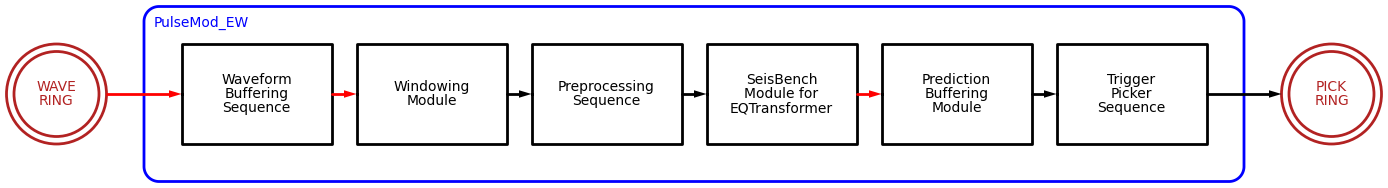

In [93]:
with Drawing() as B:
    B.config(fontsize=10, unit=0.5, fill='white')
    
    wr = flow.StateEnd(r=1).label('WAVE\nRING').color('firebrick').fill('white')
    # wr.fill('lightgreen')
    flow.Arrow().right(B.unit*3).color('red').at(wr.E)
    # flow.Arrow().theta(-30).length(A.unit*3).at(wr.SE)
    with B.container() as PM:
        PM.color('blue')
        PM.label('PulseMod_EW')
        # PM.fill('white')
        wfbuffseq = flow.Process(w=3).label('Waveform\nBuffering\nSequence').color('black')
        flow.Arrow().right().at(wfbuffseq.E).color('red')
        windmod = flow.Process(w=3).label('Windowing\nModule').color('black')
        flow.Arrow().right().at(windmod.E)
        pprocseq = flow.Process(w=3).label('Preprocessing\nSequence').color('black')
        flow.Arrow().right().at(pprocseq.E)
        sbmod = flow.Process(w=3).label('SeisBench\nModule for\nEQTransformer').color('black')
        flow.Arrow().right().color('red')
        prbuffmod = flow.Process(w=3).label('Prediction\nBuffering\nModule').color('black')#.at((13, 3.5))
        flow.Arrow().right().at(prbuffmod.E)
        trigger_seq = flow.Process(w=3).label('Trigger\nPicker\nSequence').color('black').fill('white')

        # Wires
        # flow.Wire(shape='|-', arrow='->').color('red').at(wfbuffseq.N).to(windmod.W)
        # flow.Wire(shape='c', arrow='->', k=0.2).color('blue').at(sbmod.E).to(prbuffmod.W)
    # pm = flow.RoundProcess().label('PulseMod_EW\napplying\nEQTransformer').color('blue')
    flow.Arrow().right(B.unit*3).at(trigger_seq.E)#.color('blue')
    # flow.Arrow().theta(210).length(A.unit*3).at(pm.SW)
    pr = flow.StateEnd(r=1).label('PICK\nRING')
    pr.color('firebrick')
    pr.fill('white')


    B.save('./ANSS_presentation_MOD_PULSE_level2view.png',dpi=120)

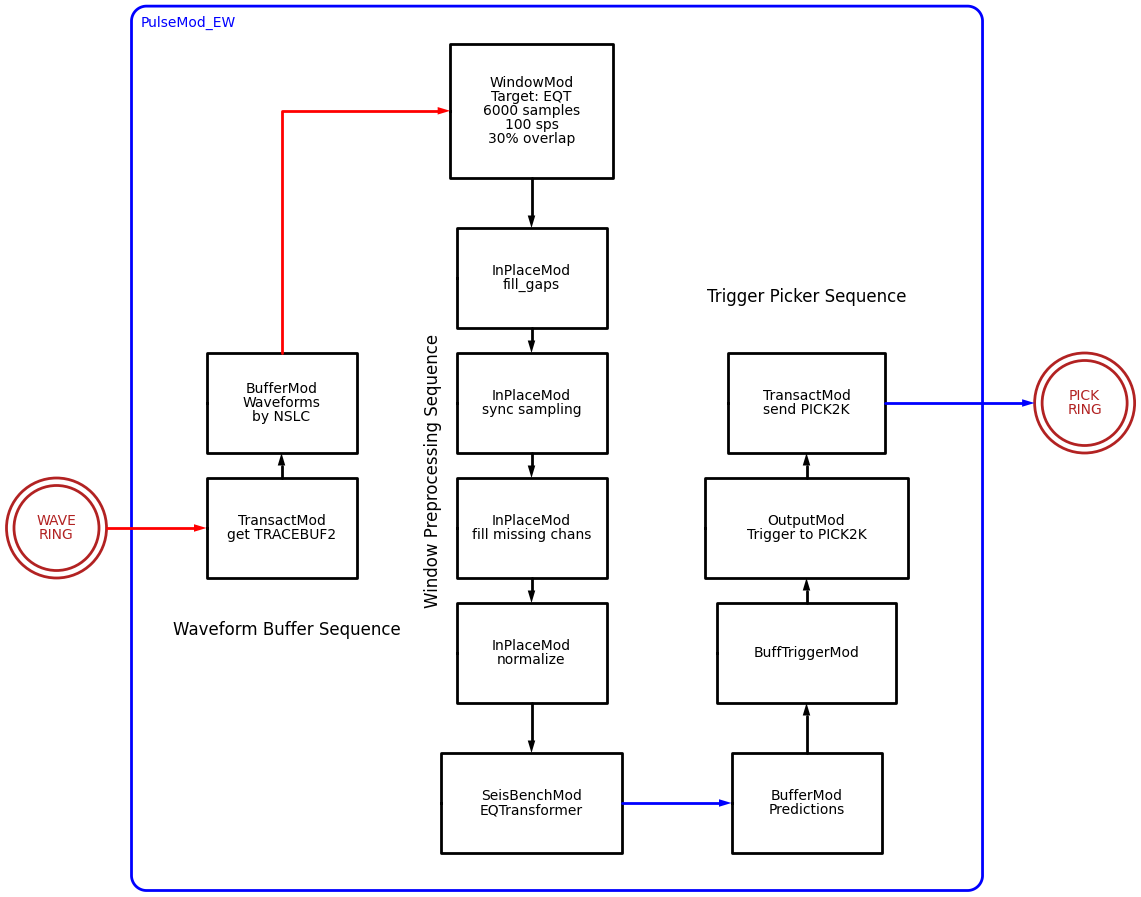

In [5]:
with Drawing() as C:
    C.config(fontsize=10, unit=0.5)
    
    wr = flow.StateEnd(r=1).label('WAVE\nRING').color('firebrick').fill('white')
    # wr.fill('lightgreen')
    flow.Arrow().right(C.unit*4).color('red')
    # flow.Arrow().theta(-30).length(A.unit*3).at(wr.SE)
    with C.container() as PM:
        PM.color('blue')
        PM.label('PulseMod_EW')
        PM.fill('white')
        with PM.container() as WFB:
            wfgetmod = flow.Process(w=3).label('TransactMod\nget TRACEBUF2')
            flow.Arrow().up().at(wfgetmod.N)
            wfbuffmod = flow.Process().label('BufferMod\nWaveforms\nby NSLC').color('black')
            WFB.label('Waveform Buffer Sequence',loc='S',halign='center', valign='top', fontsize=12)
            WFB.fill('white')
        
        windmod = flow.Process().label('WindowMod\nTarget: EQT\n6000 samples\n100 sps\n30% overlap').color('black')
        windmod.at((10.5,7))
        flow.Wire(shape='|-', arrow='->').at(wfbuffmod.N).to(windmod.W).color('red')

        flow.Arrow().down(C.unit*2).at(windmod.S)
        with PM.container() as PPS:
            fillgapmod = flow.Process().label('InPlaceMod\nfill_gaps')
            flow.Arrow().down()
            syncmod = flow.Process(w=3).label('InPlaceMod\nsync sampling')
            flow.Arrow().down()
            fillchanmod = flow.Process(w=3).label('InPlaceMod\nfill missing chans')
            flow.Arrow().down()
            normmod = flow.Process(w=3).label('InPlaceMod\nnormalize')
            PPS.label(
                'Window Preprocessing Sequence',
                loc='W',
                rotate=90,
                halign='center',
                valign='top',
                fontsize=12)
            PPS.fill('white')
        flow.Arrow().down(C.unit*2)
        sbmod = flow.Process().label('SeisBenchMod\nEQTransformer').color('black')

        prbuffmod = flow.Process().label('BufferMod\nPredictions').color('black').at((16, -4.5))
        flow.Arrow().up(C.unit*2).at(prbuffmod.N)
        with PM.container() as TPS:
            bufftrigmod = flow.Process().label('BuffTriggerMod')
            flow.Arrow().up().at(bufftrigmod.N)
            outpick2kmod = flow.Process().label('OutputMod\nTrigger to PICK2K')
            flow.Arrow().up()
            trans2kmod = flow.Process().label('TransactMod\nsend PICK2K')
            TPS.label('Trigger Picker Sequence', loc='N', halign='center', valign='bottom', fontsize=12, ofst=0.2)
            TPS.fill('white')
        flow.Arrow().at(sbmod.E).to(prbuffmod.W).color('blue')
    flow.Arrow().right(C.unit*6).at(trans2kmod.E).color('blue')
    pickring = flow.StateEnd(r=1).label('PICK\nRING').color('firebrick').fill('white')


    C.save('./ANSS_presentation_MOD_PULSE_level3view.png',dpi=120)

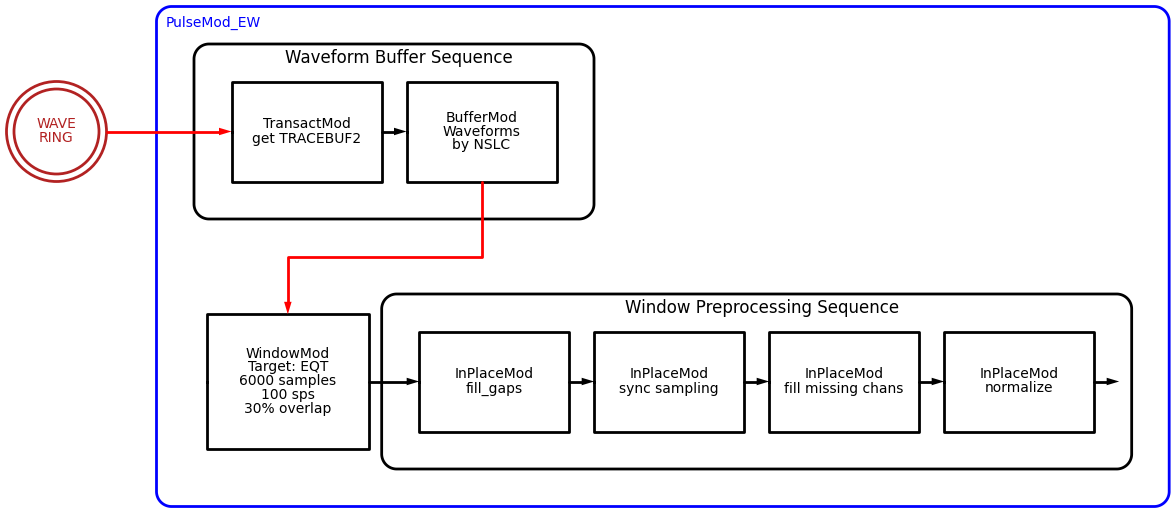

NameError: name 'A' is not defined

In [17]:
with Drawing() as D:
    D.config(fontsize=10, unit=0.5)
    
    wr = flow.StateEnd(r=1).label('WAVE\nRING').color('firebrick').fill('white').at((-5,0))
    # wr.fill('lightgreen')
    flow.Arrow().right(D.unit*5).color('red')
    # flow.Arrow().theta(-30).length(A.unit*3).at(wr.SE)
    with D.container() as PM:
        PM.color('blue')
        PM.label('PulseMod_EW')
        # PM.fill('white')
        with PM.container() as WFB:
            wfgetmod = flow.Process(w=3).label('TransactMod\nget TRACEBUF2')
            flow.Arrow().right().at(wfgetmod.E)
            wfbuffmod = flow.Process().label('BufferMod\nWaveforms\nby NSLC').color('black')
            WFB.label('Waveform Buffer Sequence',loc='N',halign='center', valign='top', fontsize=12)
            WFB.fill('white')
            WFB.color('black')
        
        windmod = flow.Process().label('WindowMod\nTarget: EQT\n6000 samples\n100 sps\n30% overlap').color('black')
        windmod.at((-1,-5))
        flow.Wire(shape='n', arrow='->', k=-1.5).at(wfbuffmod.S).to(windmod.N).color('red')
        # flow.Wire(shape='|-', arrow='->').at(wfbuffmod.S).to(windmod.N).color('red')

        flow.Arrow().right(D.unit*2).at(windmod.E)
        with PM.container() as PPS:
            fillgapmod = flow.Process().label('InPlaceMod\nfill_gaps')
            flow.Arrow().right()
            syncmod = flow.Process(w=3).label('InPlaceMod\nsync sampling')
            flow.Arrow().right()
            fillchanmod = flow.Process(w=3).label('InPlaceMod\nfill missing chans')
            flow.Arrow().right()
            normmod = flow.Process(w=3).label('InPlaceMod\nnormalize')
            PPS.label(
                'Window Preprocessing Sequence',
                loc='N',
                rotate=0,
                halign='center',
                valign='top',
                fontsize=12)
            PPS.fill('white')

        flow.Arrow().right(A.unit*2)
        sbmod = flow.Process().label('SeisBenchMod\nEQTransformer').color('black')

    #     prbuffmod = flow.Process().label('BufferMod\nPredictions').color('black').at((16, -4.5))
    #     flow.Arrow().up(A.unit*2).at(prbuffmod.N)
    #     with PM.container() as TPS:
    #         bufftrigmod = flow.Process().label('BuffTriggerMod')
    #         flow.Arrow().up().at(bufftrigmod.N)
    #         outpick2kmod = flow.Process().label('OutputMod\nTrigger to PICK2K')
    #         flow.Arrow().up()
    #         trans2kmod = flow.Process().label('TransactMod\nsend PICK2K')
    #         TPS.label('Trigger Picker Sequence', loc='N', halign='center', valign='bottom', fontsize=12, ofst=0.2)
    #         TPS.fill('white')
    #     flow.Arrow().at(sbmod.E).to(prbuffmod.W).color('blue')
    # flow.Arrow().right(A.unit*6).at(trans2kmod.E).color('blue')
    # pickring = flow.StateEnd(r=1).label('PICK\nRING').color('firebrick').fill('white')
    #     flow.Arrow().down().at(prbuffmod.S)
    #     trigger_seq = flow.RoundProcess().label('Trigger\nPicker\nSequence').color('black')

    #     # Wires
    #     flow.Wire(shape='|-', arrow='->').color('red').at(wfbuffseq.N).to(windmod.W)
    #     flow.Wire(shape='c', arrow='->', k=0.2).color('blue').at(sbmod.E).to(prbuffmod.W)
    # # pm = flow.RoundProcess().label('PulseMod_EW\napplying\nEQTransformer').color('blue')
    # flow.Arrow().right(A.unit*3).at(trigger_seq.E).color('blue')
    # # flow.Arrow().theta(210).length(A.unit*3).at(pm.SW)
    # pr = flow.StateEnd(r=1).label('PICK\nRING')
    # pr.color('firebrick')
    # pr.fill('white')


    # A.save('./ANSS_presentation_MOD_PULSE_level3view_hztl.png',dpi=120)

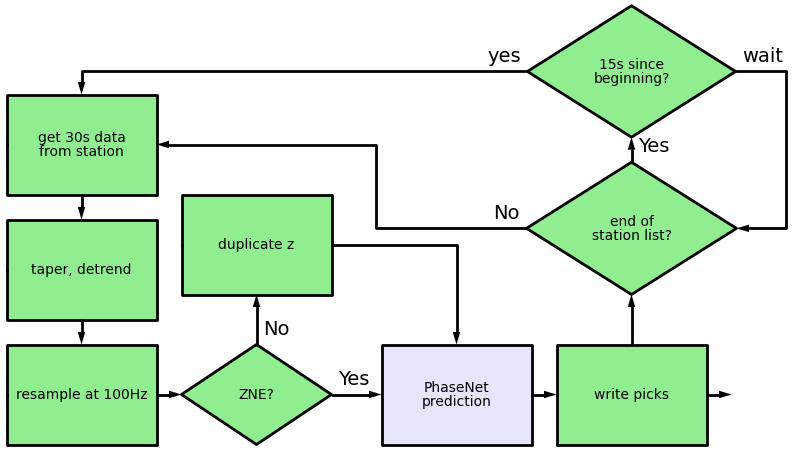

In [94]:
with Drawing() as R:
    R.config(fontsize=10, unit=0.5)
    p1 = flow.Process(w=3, h=2).label('get 30s data\nfrom station').fill('lightgreen')
    flow.Arrow().down().at(p1.S)
    p2 = flow.Process(w=3).label('taper, detrend').fill('lightgreen')
    flow.Arrow().down().at(p2.S)
    p3 = flow.Process(w=3).label('resample at 100Hz').fill('lightgreen')
    flow.Arrow().right().at(p3.E)
    d1 = flow.Decision(N='No',E='Yes').fill('lightgreen').label('ZNE?')
    flow.Arrow().right(R.unit*2).at(d1.E)
    p4 = flow.Process(w=3,h=2).label('PhaseNet\nprediction').fill('lavender')
    flow.Arrow().right().at(p4.E)
    p5 = flow.Process().label('write picks').fill('lightgreen')
    flow.Arrow().right().at(p5.E)
    # p6 = flow.Process().label('associator').fill('lightcyan')
    # flow.Arrow().right().at(p6.E)

    flow.Arrow().up(R.unit*2).at(d1.N)
    p4a = flow.Process().label('duplicate z').fill('lightgreen')
    flow.Wire(shape='-|',arrow='->').at(p4a.E).to(p4.N)
    
    flow.Arrow().up(R.unit*2).at(p5.N)
    d2 = flow.Decision(W='No', N='Yes').fill('lightgreen').label('end of\nstation list?')
    flow.Wire(shape='c',arrow='->', k=-3).at(d2.W).to(p1.E)

    flow.Arrow().up().at(d2.N)
    d3 = flow.Decision(E='wait', W='yes').label('15s since\nbeginning?').fill('lightgreen')
    flow.Wire(shape='c', arrow='->').at(d3.E).to(d2.E)
    flow.Wire(shape='-|', arrow='->').at(d3.W).to(p1.N)

    R.save('./Retailleau_etal_2022_PFD_remake.png', dpi=120)